In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split as train_valid_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os

# Data processing 

In [10]:
# Load
train_dataset = pd.read_csv("train.csv")

   TotalTimeStopped_p20  TotalTimeStopped_p50  TotalTimeStopped_p80  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   DistanceToFirstStop_p20  DistanceToFirstStop_p50  DistanceToFirstStop_p80  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                      0.0                      0.0                      0.0  
4                      0.0                      0.0                      0.0  


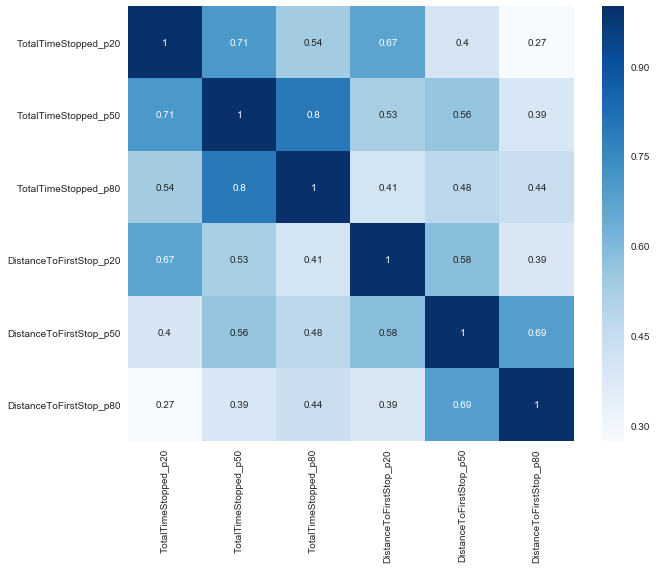

In [17]:
# Target Variables - For Kaggle competition
target_cols = ['TotalTimeStopped_p20','TotalTimeStopped_p50', 'TotalTimeStopped_p80',
               'DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']
print train_dataset[target_cols].head()

# Correlation between target variables
g = train_dataset[target_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(g,annot=True,cmap='Blues')
plt.show()

In [20]:
# Variables of interest
feature_cols = ['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend', 'Month', 'Path','City']

print feature_cols

['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend', 'Month', 'Path', 'City']


In [23]:
# variable details
train_dataset[feature_cols].describe(include='all').T

count unique                                        top  \
RowId            857409    NaN                                        NaN   
IntersectionId   857409    NaN                                        NaN   
Latitude         857409    NaN                                        NaN   
Longitude        857409    NaN                                        NaN   
EntryStreetName  849220   1707                         North Broad Street   
ExitStreetName   851875   1693                         North Broad Street   
EntryHeading     857409      8                                          E   
ExitHeading      857409      8                                          W   
Hour             857409    NaN                                        NaN   
Weekend          857409    NaN                                        NaN   
Month            857409    NaN                                        NaN   
Path             857409  15111  North Broad Street_N_North Broad Street_N   
City             857409      4                               Philadelphia   

                   freq         mean       std          min          25%  \
RowId               NaN  2.34904e+06    247513  1.92034e+06  2.13469e+06   
IntersectionId      NaN      836.331   644.201            0          306   
Latitude            NaN      39.6576   2.92076        33.65      39.9376   
Longitude           NaN     -77.9004   5.97581     -87.8367     -84.3877   
EntryStreetName   18938          NaN       NaN          NaN          NaN   
ExitStreetName    19507          NaN       NaN          NaN          NaN   
EntryHeading     172814          NaN       NaN          NaN          NaN   
ExitHeading      173419          NaN       NaN          NaN          NaN   
Hour                NaN      12.4275    6.0621            0            8   
Weekend             NaN     0.277485  0.447758            0            0   
Month               NaN      9.10445   1.99323            1            7   
Path               7032          NaN       NaN          NaN          NaN   
City             388322          NaN       NaN          NaN          NaN   

                         50%          75%          max  
RowId            2.34904e+06  2.56339e+06  2.77774e+06  
IntersectionId           685         1254         2875  
Latitude             39.9858      41.9186      42.3818  
Longitude           -75.1733     -75.0802     -71.0235  
EntryStreetName          NaN          NaN          NaN  
ExitStreetName           NaN          NaN          NaN  
EntryHeading             NaN          NaN          NaN  
ExitHeading              NaN          NaN          NaN  
Hour                      13           17           23  
Weekend                    0            1            1  
Month                      9           11           12  
Path                     NaN          NaN          NaN  
City                     NaN          NaN          NaN

In [30]:
# variables datatypes 
train_dataset[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 13 columns):
RowId              857409 non-null int64
IntersectionId     857409 non-null int64
Latitude           857409 non-null float64
Longitude          857409 non-null float64
EntryStreetName    849220 non-null object
ExitStreetName     851875 non-null object
EntryHeading       857409 non-null object
ExitHeading        857409 non-null object
Hour               857409 non-null int64
Weekend            857409 non-null int64
Month              857409 non-null int64
Path               857409 non-null object
City               857409 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 85.0+ MB


Variable:  EntryStreetName  :  ['Marietta Boulevard Northwest' nan 'Peachtree Street Southwest' ...
 'West Somerville Avenue' 'Lindley Avenue' 'Rorer Street']
North Broad Street                   18938
Roosevelt Boulevard                  12490
South Broad Street                   11906
Washington Street                    10516
Market Street                         9725
Frankford Avenue                      8482
Washington Avenue                     8315
West Girard Avenue                    8045
Cambridge Street                      7866
Walnut Street                         7812
Massachusetts Avenue                  7667
Spring Garden Street                  7456
Chestnut Street                       7188
Cottman Avenue                        6205
Commonwealth Avenue                   5960
Baltimore Avenue                      5740
Ponce de Leon Avenue Northeast        5553
Aramingo Avenue                       5337
South Street                          5122
Vine Street             

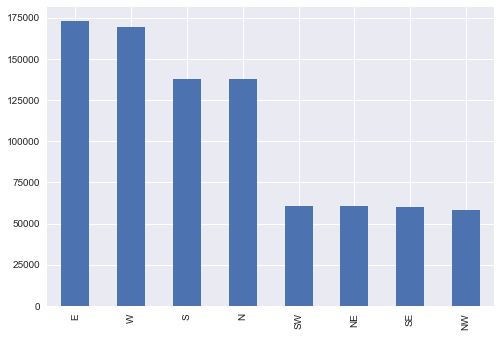

Variable:  ExitHeading  :  ['NW' 'SE' 'NE' 'SW' 'E' 'W' 'N' 'S']


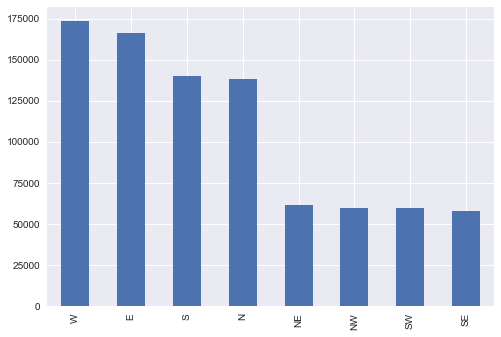

Variable:  Path  :  ['Marietta Boulevard Northwest_NW_Marietta Boulevard Northwest_NW'
 'Marietta Boulevard Northwest_SE_Marietta Boulevard Northwest_SE'
 'Unknown_NE_Marietta Boulevard Northwest_SE' ...
 'Crescent Drive_N_League Island Boulevard_W'
 'South 4th Street_S_Catharine Street_W'
 'Catharine Street_W_South 4th Street_S']
North Broad Street_N_North Broad Street_N                             7032
North Broad Street_S_North Broad Street_S                             6935
Walnut Street_W_Walnut Street_W                                       5310
Chestnut Street_E_Chestnut Street_E                                   5009
South Broad Street_N_South Broad Street_N                             4557
Roosevelt Boulevard_W_Roosevelt Boulevard_W                           4361
South Broad Street_S_South Broad Street_S                             4299
Market Street_E_Market Street_E                                       3595
West Girard Avenue_E_West Girard Avenue_E                          

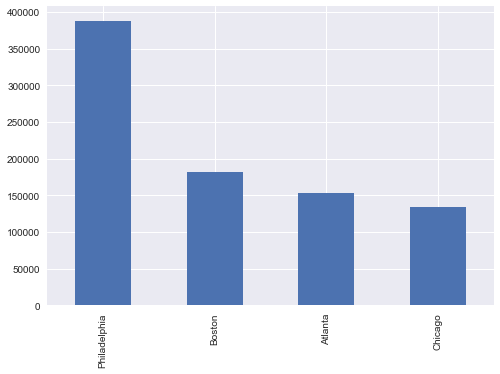

In [37]:
# use object datatype variables
cat_cols = train_dataset[feature_cols].select_dtypes('O').columns

# plot content foraeach variable 
for col in cat_cols:
    print "Variable: ", col, " : ", train_dataset[col].unique()
    if(len(train_dataset[col].unique())<50):
        train_dataset[col].value_counts().plot(kind='bar')
        plt.show()
    else:
        print(train_dataset[col].value_counts())

# Random Forest Modeling

In [39]:
# First case: DistanceToFirstStop_p80
# Delete extra variables , It means ['EntryStreetName','ExitStreetName','Path']
cols = set(feature_cols+['DistanceToFirstStop_p80']).difference(['EntryStreetName','ExitStreetName','Path'])
train_dataset[cols].head()

ExitHeading  Hour     City  DistanceToFirstStop_p80  Month EntryHeading  \
0          NW     0  Atlanta                      0.0      6           NW   
1          SE     0  Atlanta                      0.0      6           SE   
2          NW     1  Atlanta                      0.0      6           NW   
3          SE     1  Atlanta                      0.0      6           SE   
4          NW     2  Atlanta                      0.0      6           NW   

   Longitude    RowId  Latitude  Weekend  IntersectionId  
0  -84.43003  1920335  33.79166        0               0  
1  -84.43003  1920336  33.79166        0               0  
2  -84.43003  1920337  33.79166        0               0  
3  -84.43003  1920338  33.79166        0               0  
4  -84.43003  1920339  33.79166        0               0

In [42]:
# convert categorical varibales to dummies variables
cat_cols = ['City','ExitHeading','EntryHeading']
training_data = pd.get_dummies(train_dataset[cols],columns=cat_cols)
training_data.head()

Hour  DistanceToFirstStop_p80  Month  Longitude    RowId  Latitude  \
0     0                      0.0      6  -84.43003  1920335  33.79166   
1     0                      0.0      6  -84.43003  1920336  33.79166   
2     1                      0.0      6  -84.43003  1920337  33.79166   
3     1                      0.0      6  -84.43003  1920338  33.79166   
4     2                      0.0      6  -84.43003  1920339  33.79166   

   Weekend  IntersectionId  City_Atlanta  City_Boston  ...  ExitHeading_SW  \
0        0               0             1            0  ...               0   
1        0               0             1            0  ...               0   
2        0               0             1            0  ...               0   
3        0               0             1            0  ...               0   
4        0               0             1            0  ...               0   

   ExitHeading_W  EntryHeading_E  EntryHeading_N  EntryHeading_NE  \
0              0               0               0                0   
1              0               0               0                0   
2              0               0               0                0   
3              0               0               0                0   
4              0               0               0                0   

   EntryHeading_NW  EntryHeading_S  EntryHeading_SE  EntryHeading_SW  \
0                1               0                0                0   
1                0               0                1                0   
2                1               0                0                0   
3                0               0                1                0   
4                1               0                0                0   

   EntryHeading_W  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 28 columns]

In [51]:
y_col = 'DistanceToFirstStop_p80'
y = training_data[y_col]
Xs = training_data.drop(y_col,axis=1)

# Test 20%, Train 80%
X_train,X_valid, y_train, y_valid = train_valid_split(Xs, y, test_size = .2, random_state=0)
print "Info:"
print "Train: "
print "\tPatterns: ", X_train.shape[0]
print "\tVariables: ", X_train.shape[1]
print "Test: "
print "\tPatterns: ", X_valid.shape[0]
print "\tVariables: ", X_valid.shape[1]

Info:
Train: 
	Patterns:  685927
	Variables:  27
Test: 
	Patterns:  171482
	Variables:  27


In [53]:
%%time
model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,random_state=0)
ft = model.fit(X_train,y_train)
print ft

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
CPU times: user 2min 1s, sys: 3.92 s, total: 2min 5s
Wall time: 1min 44s


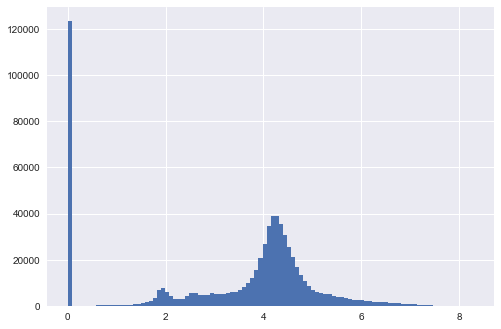

('train_rmse: ', 36.739363865514605)


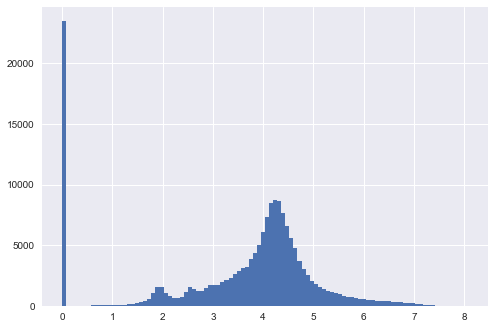

('valid_rmse: ', 87.98922897045722)


In [54]:
def RMSE(actual,preds):
    return np.sqrt(mean_squared_error(actual,preds))

def get_evaluations(model):
    preds = model.predict(X_train)
    plt.hist(np.log1p(preds),bins=100)
    plt.show();
    print('train_rmse: ',RMSE(y_train,preds))
                    
    preds = model.predict(X_valid)
    plt.hist(np.log1p(preds),bins=100)
    plt.show()
    print('valid_rmse: ',RMSE(y_valid,preds))
    
get_evaluations(model)